In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import datetime
plt.rcParams['figure.figsize']=(10, 5)
plt.rcParams['figure.dpi']= 300
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("bikes.csv")
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [4]:
df.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [6]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [7]:
df.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.describe()

,model_year,price
count,7796.000000,7.796000e+03
mean,2015.405849,1.060233e+05
std,3.854537,1.364439e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


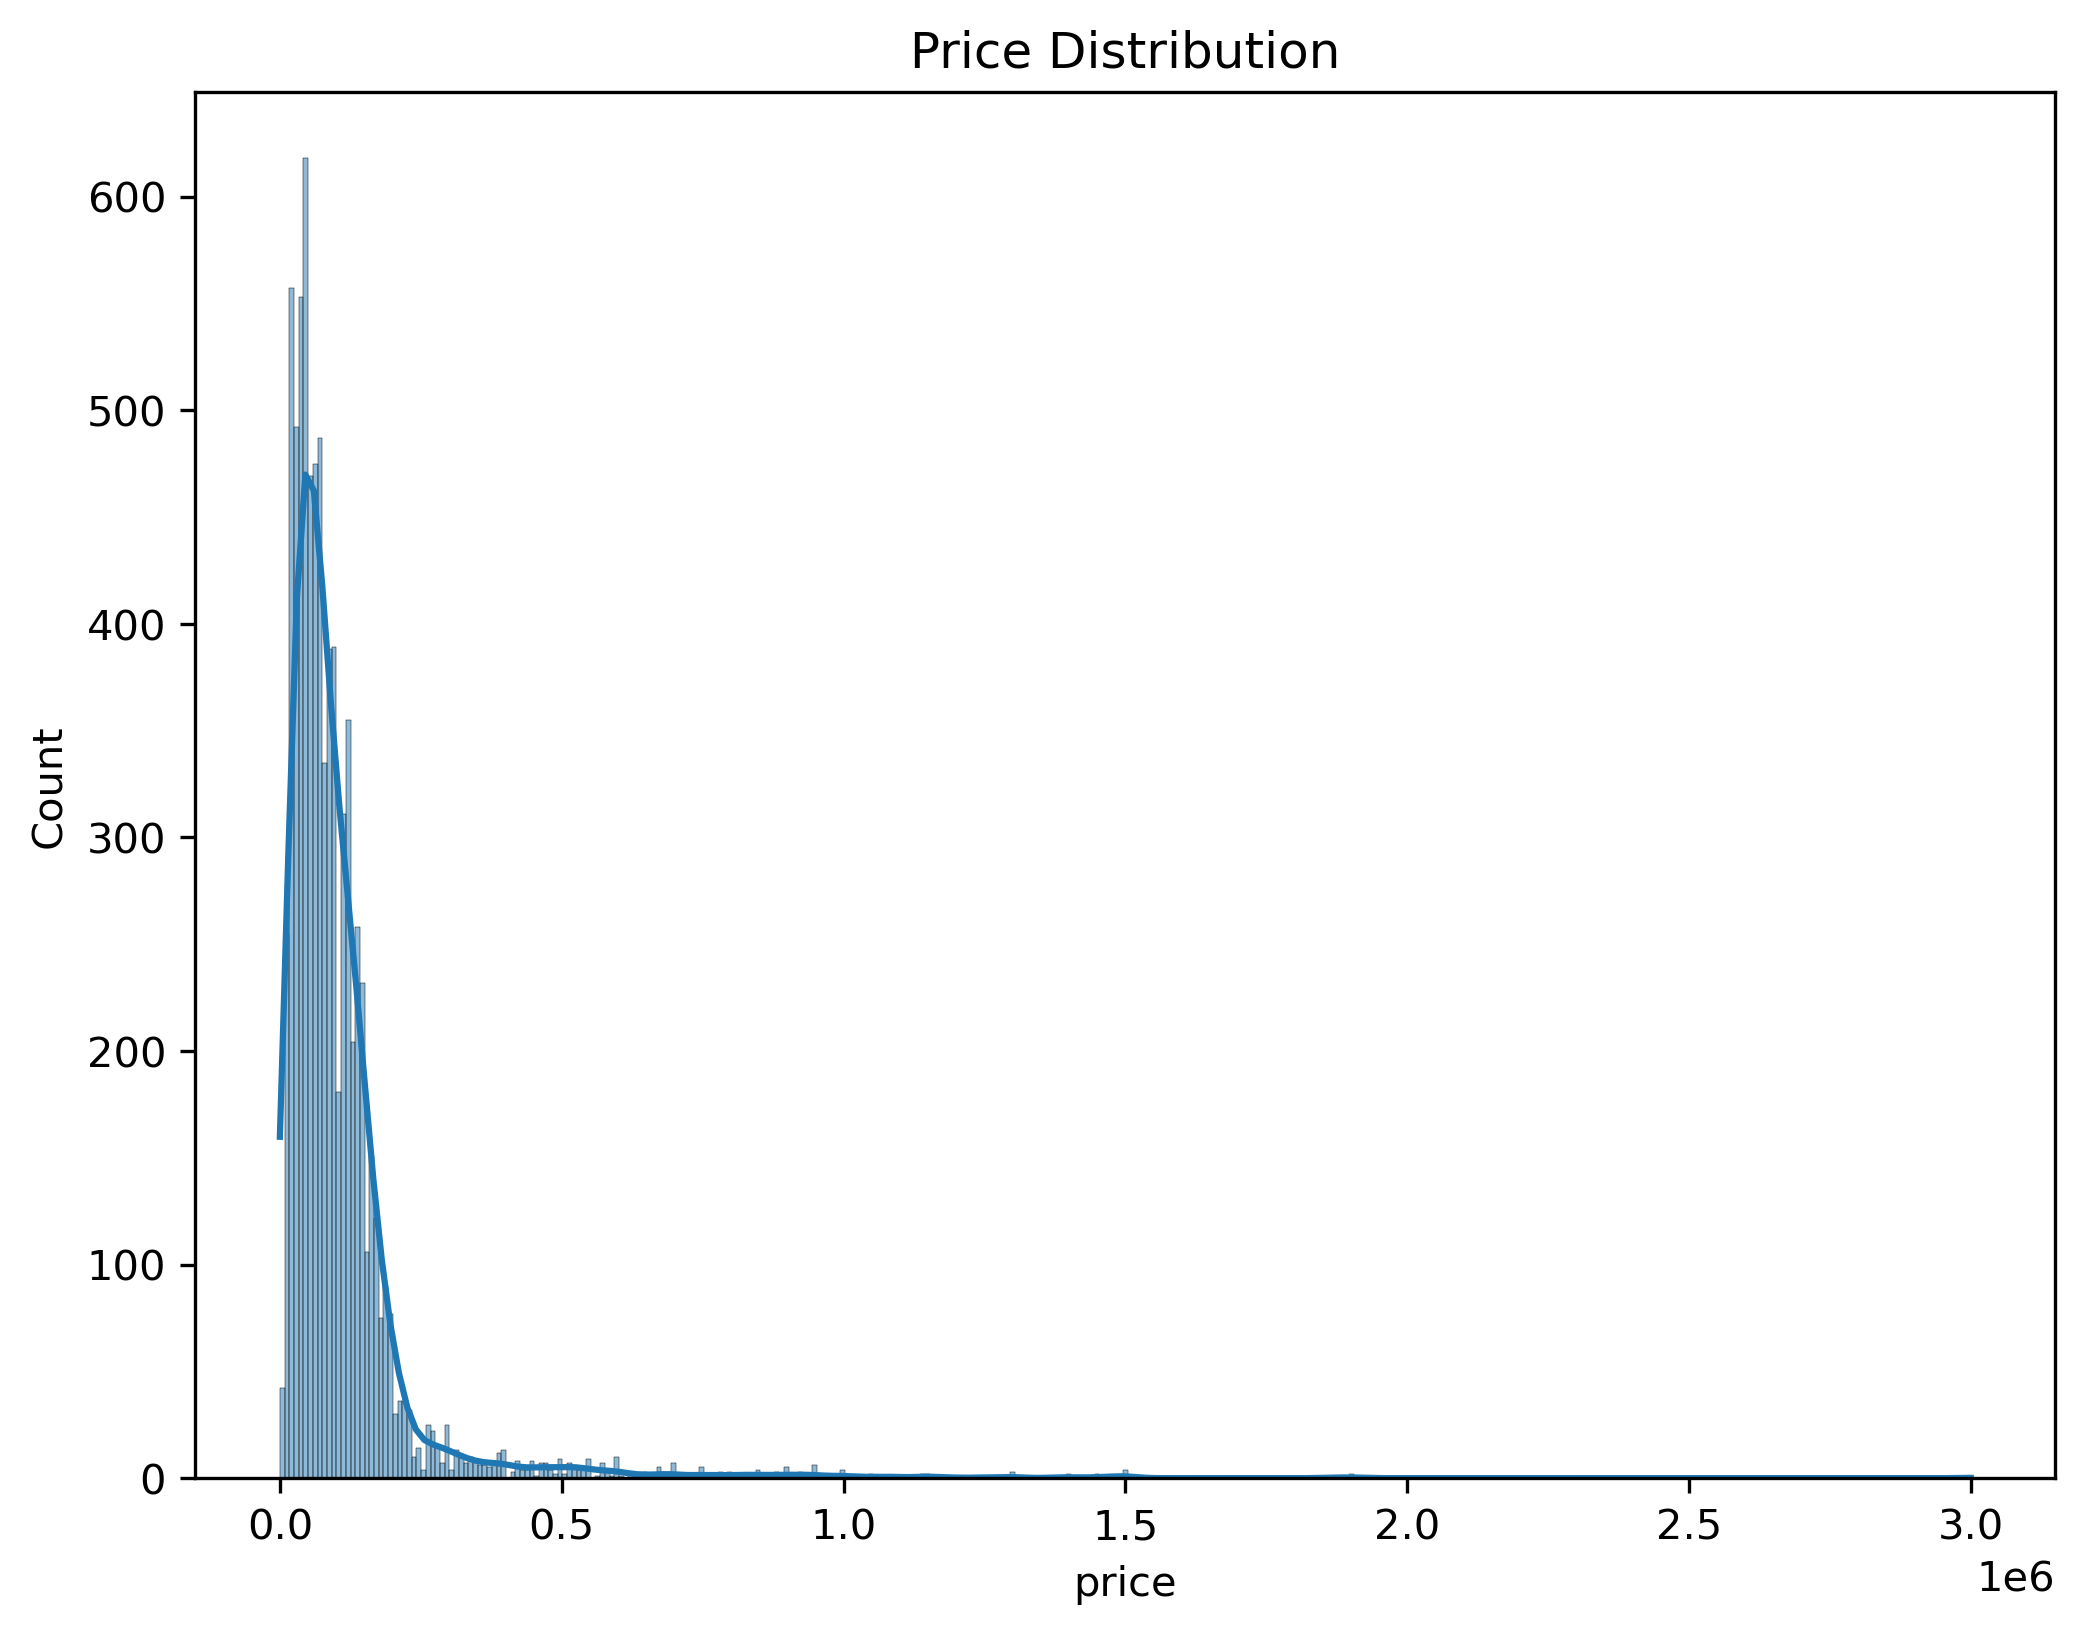

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

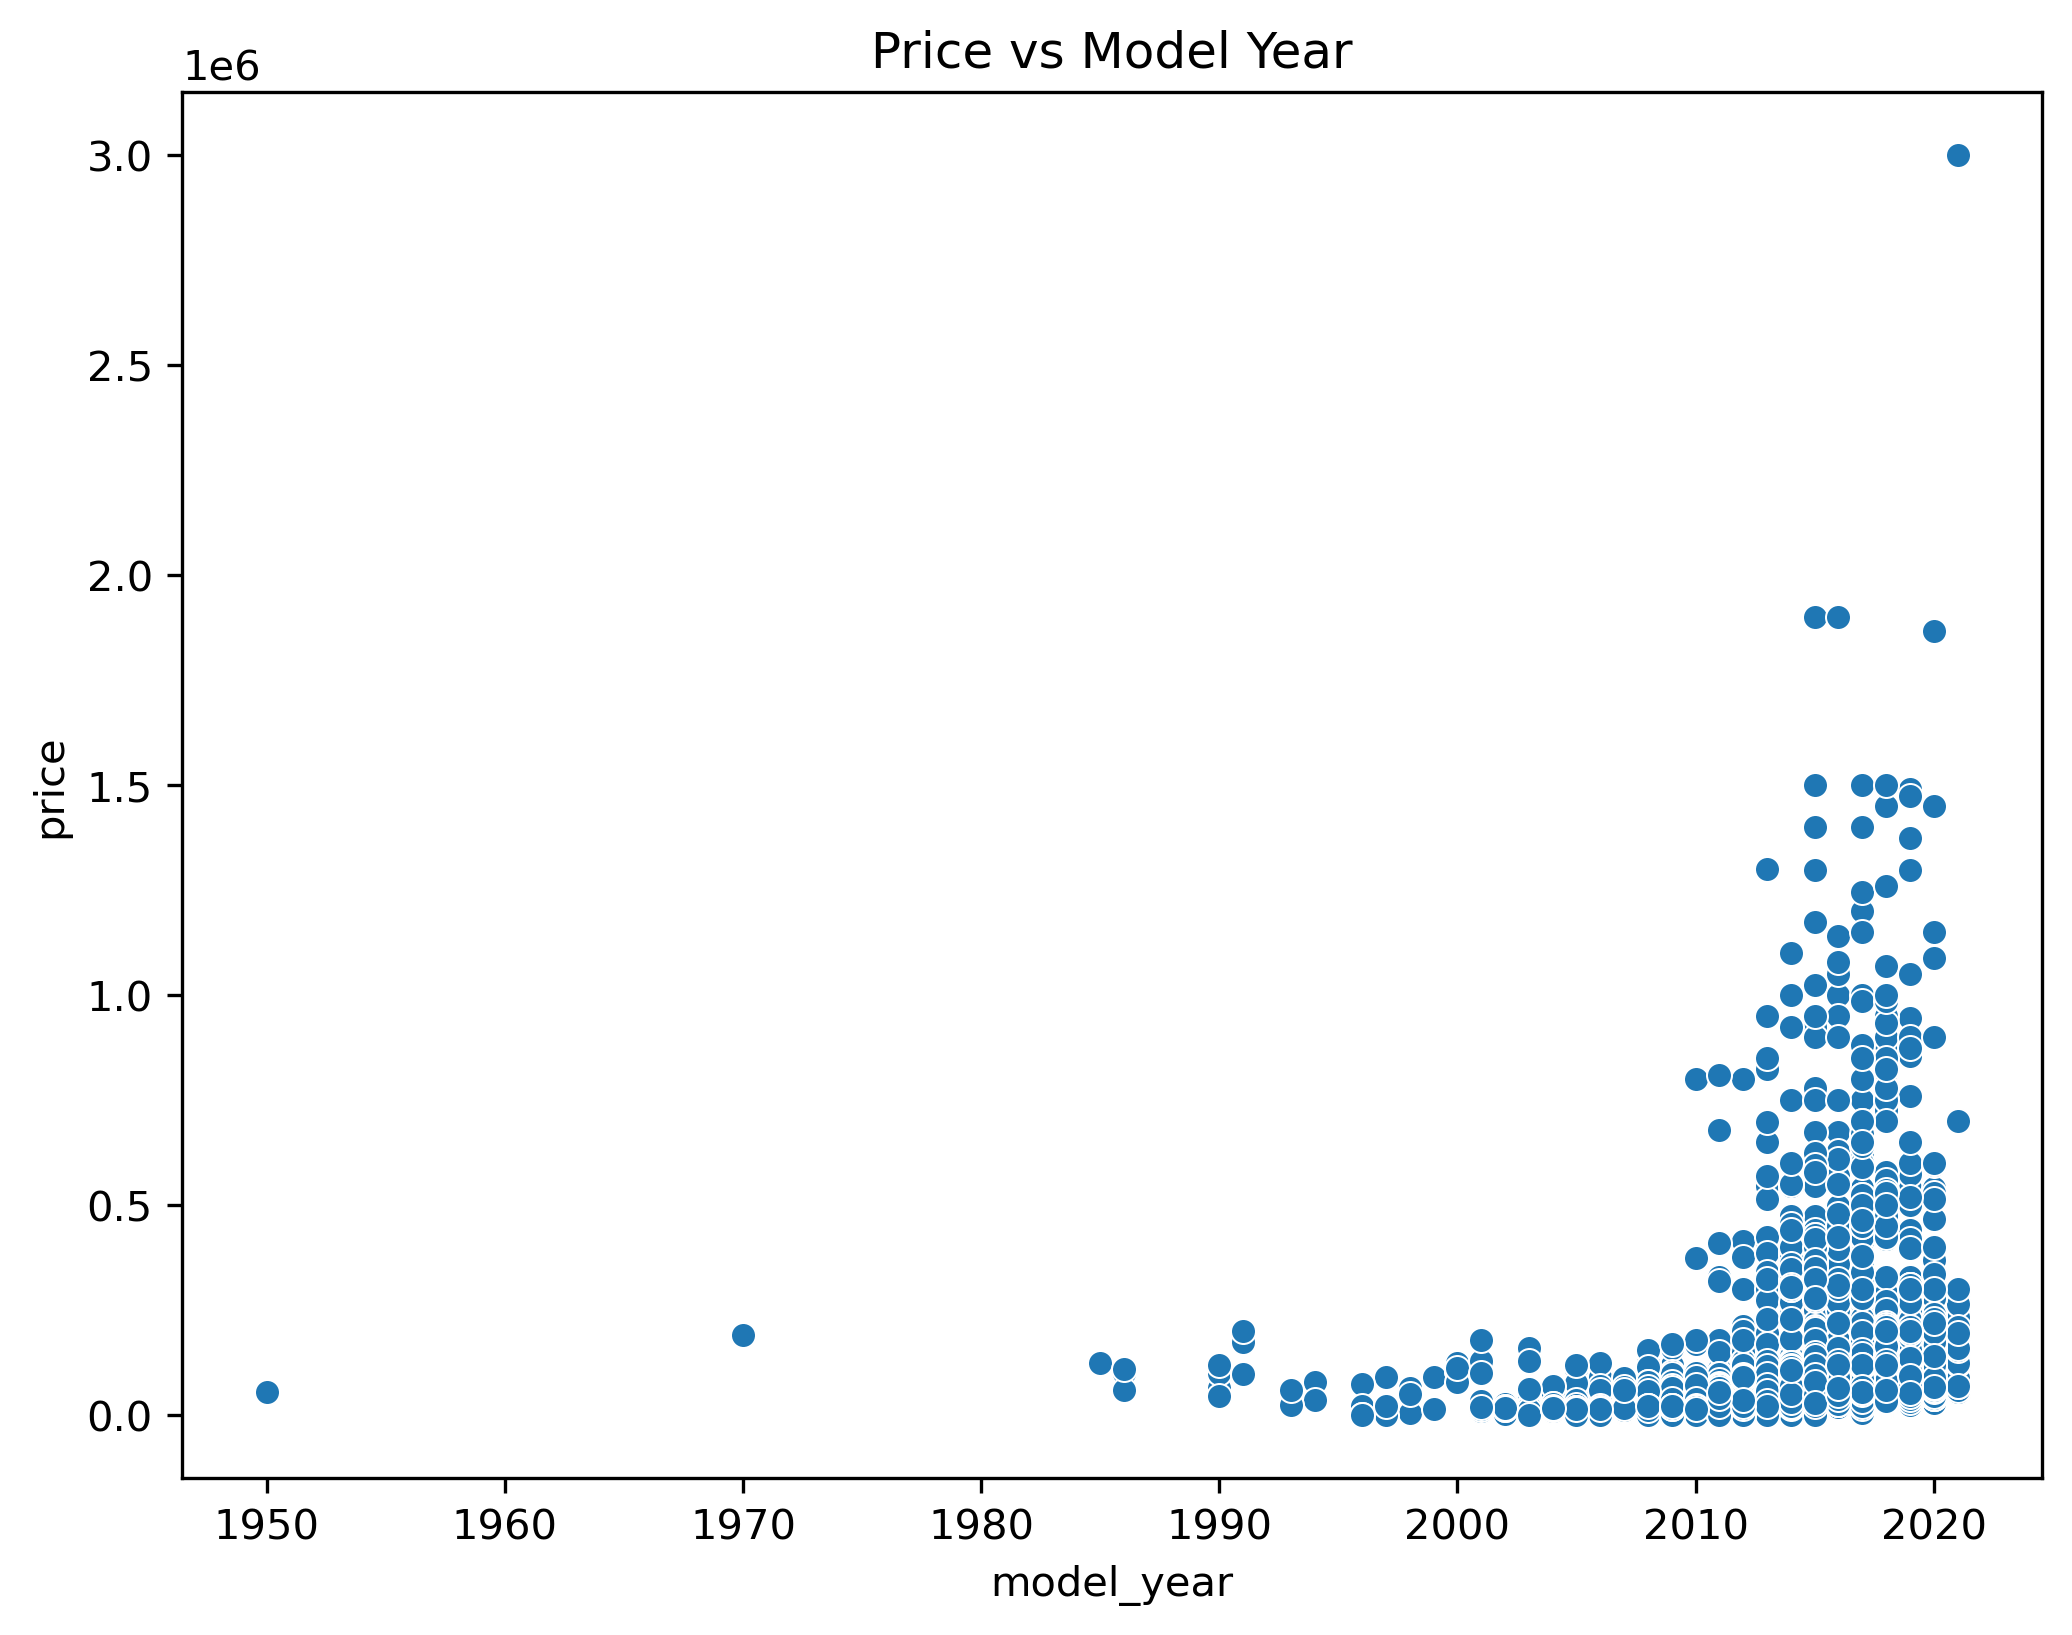

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='model_year', y='price')
plt.title('Price vs Model Year')
plt.show()

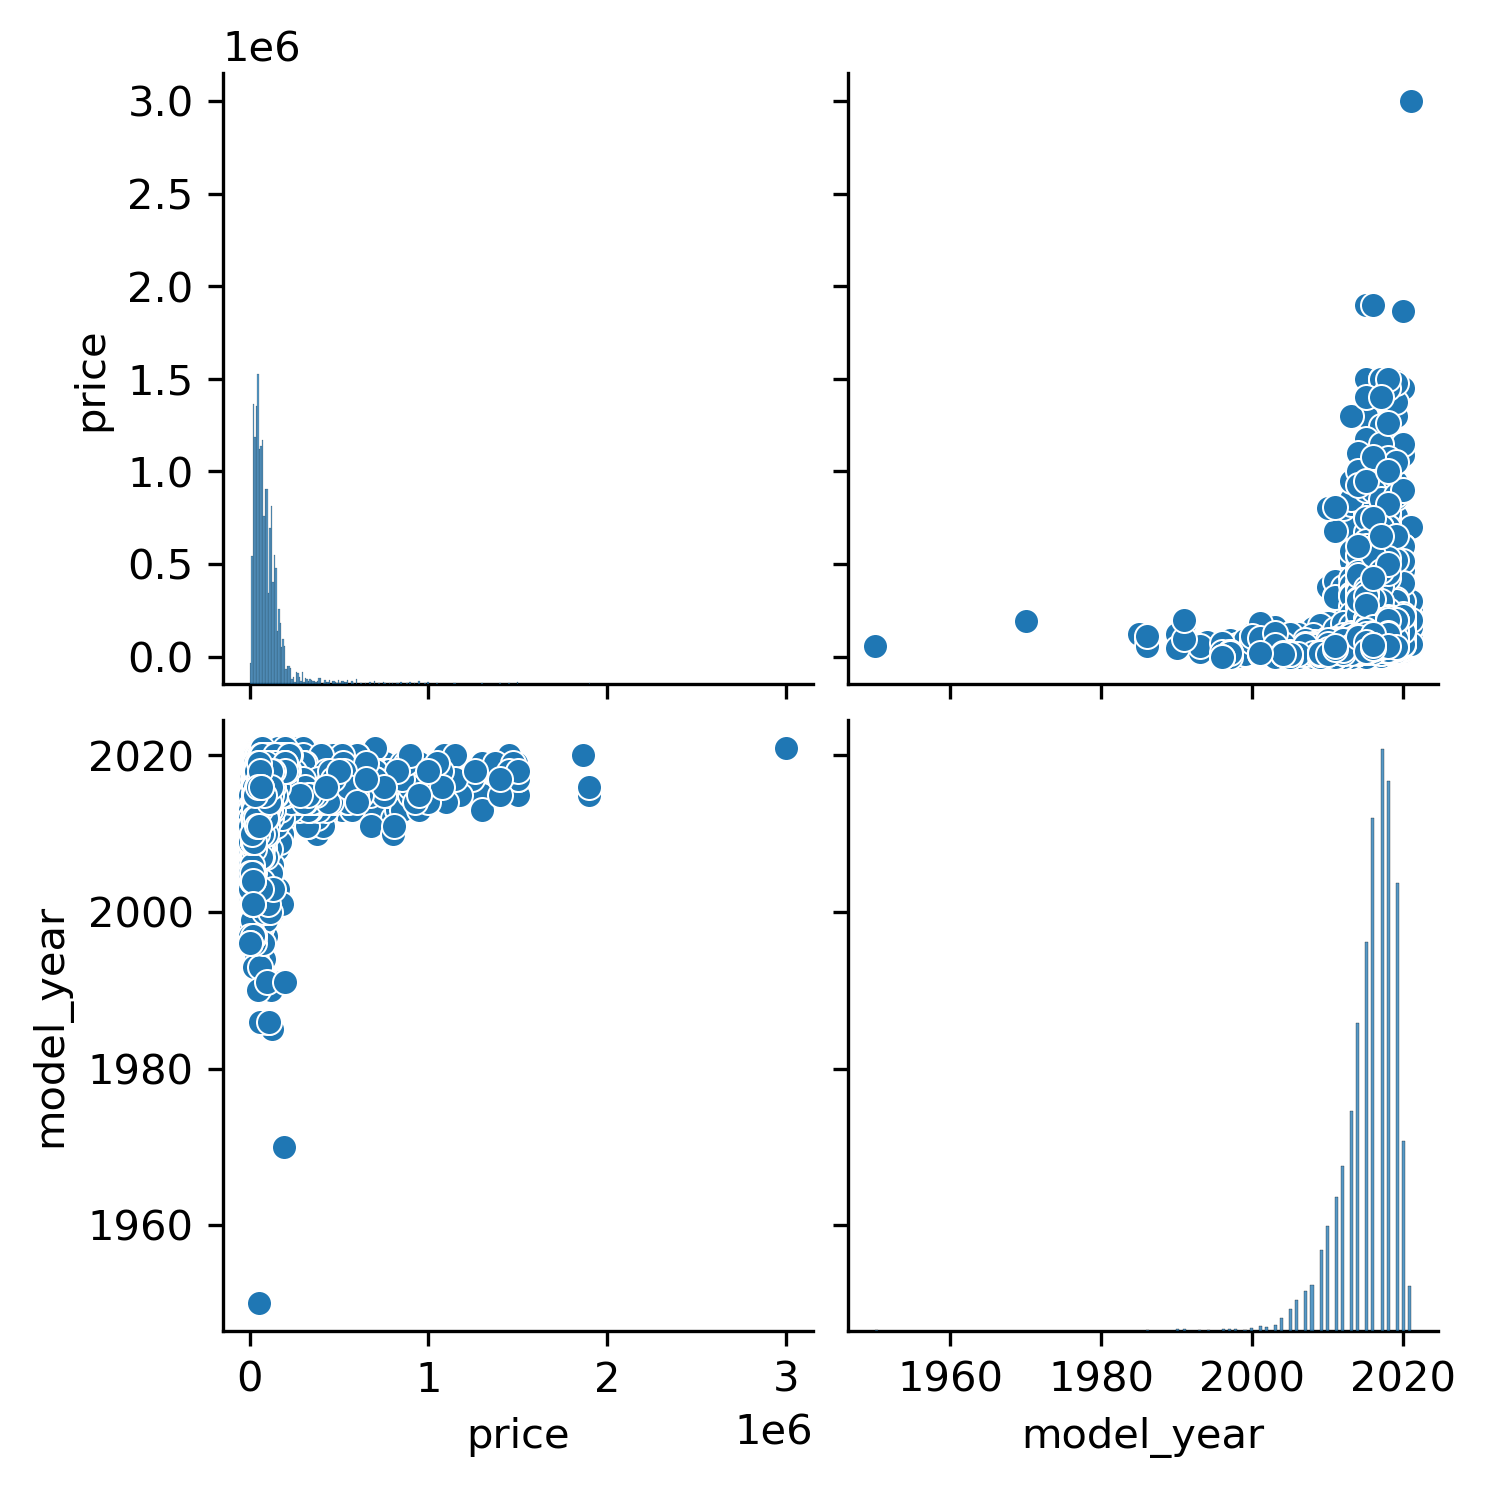

In [12]:
sns.pairplot(df[['price', 'kms_driven', 'mileage', 'power','model_year']])
plt.show()

In [13]:
df.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

Text(0, 0.5, 'Count')

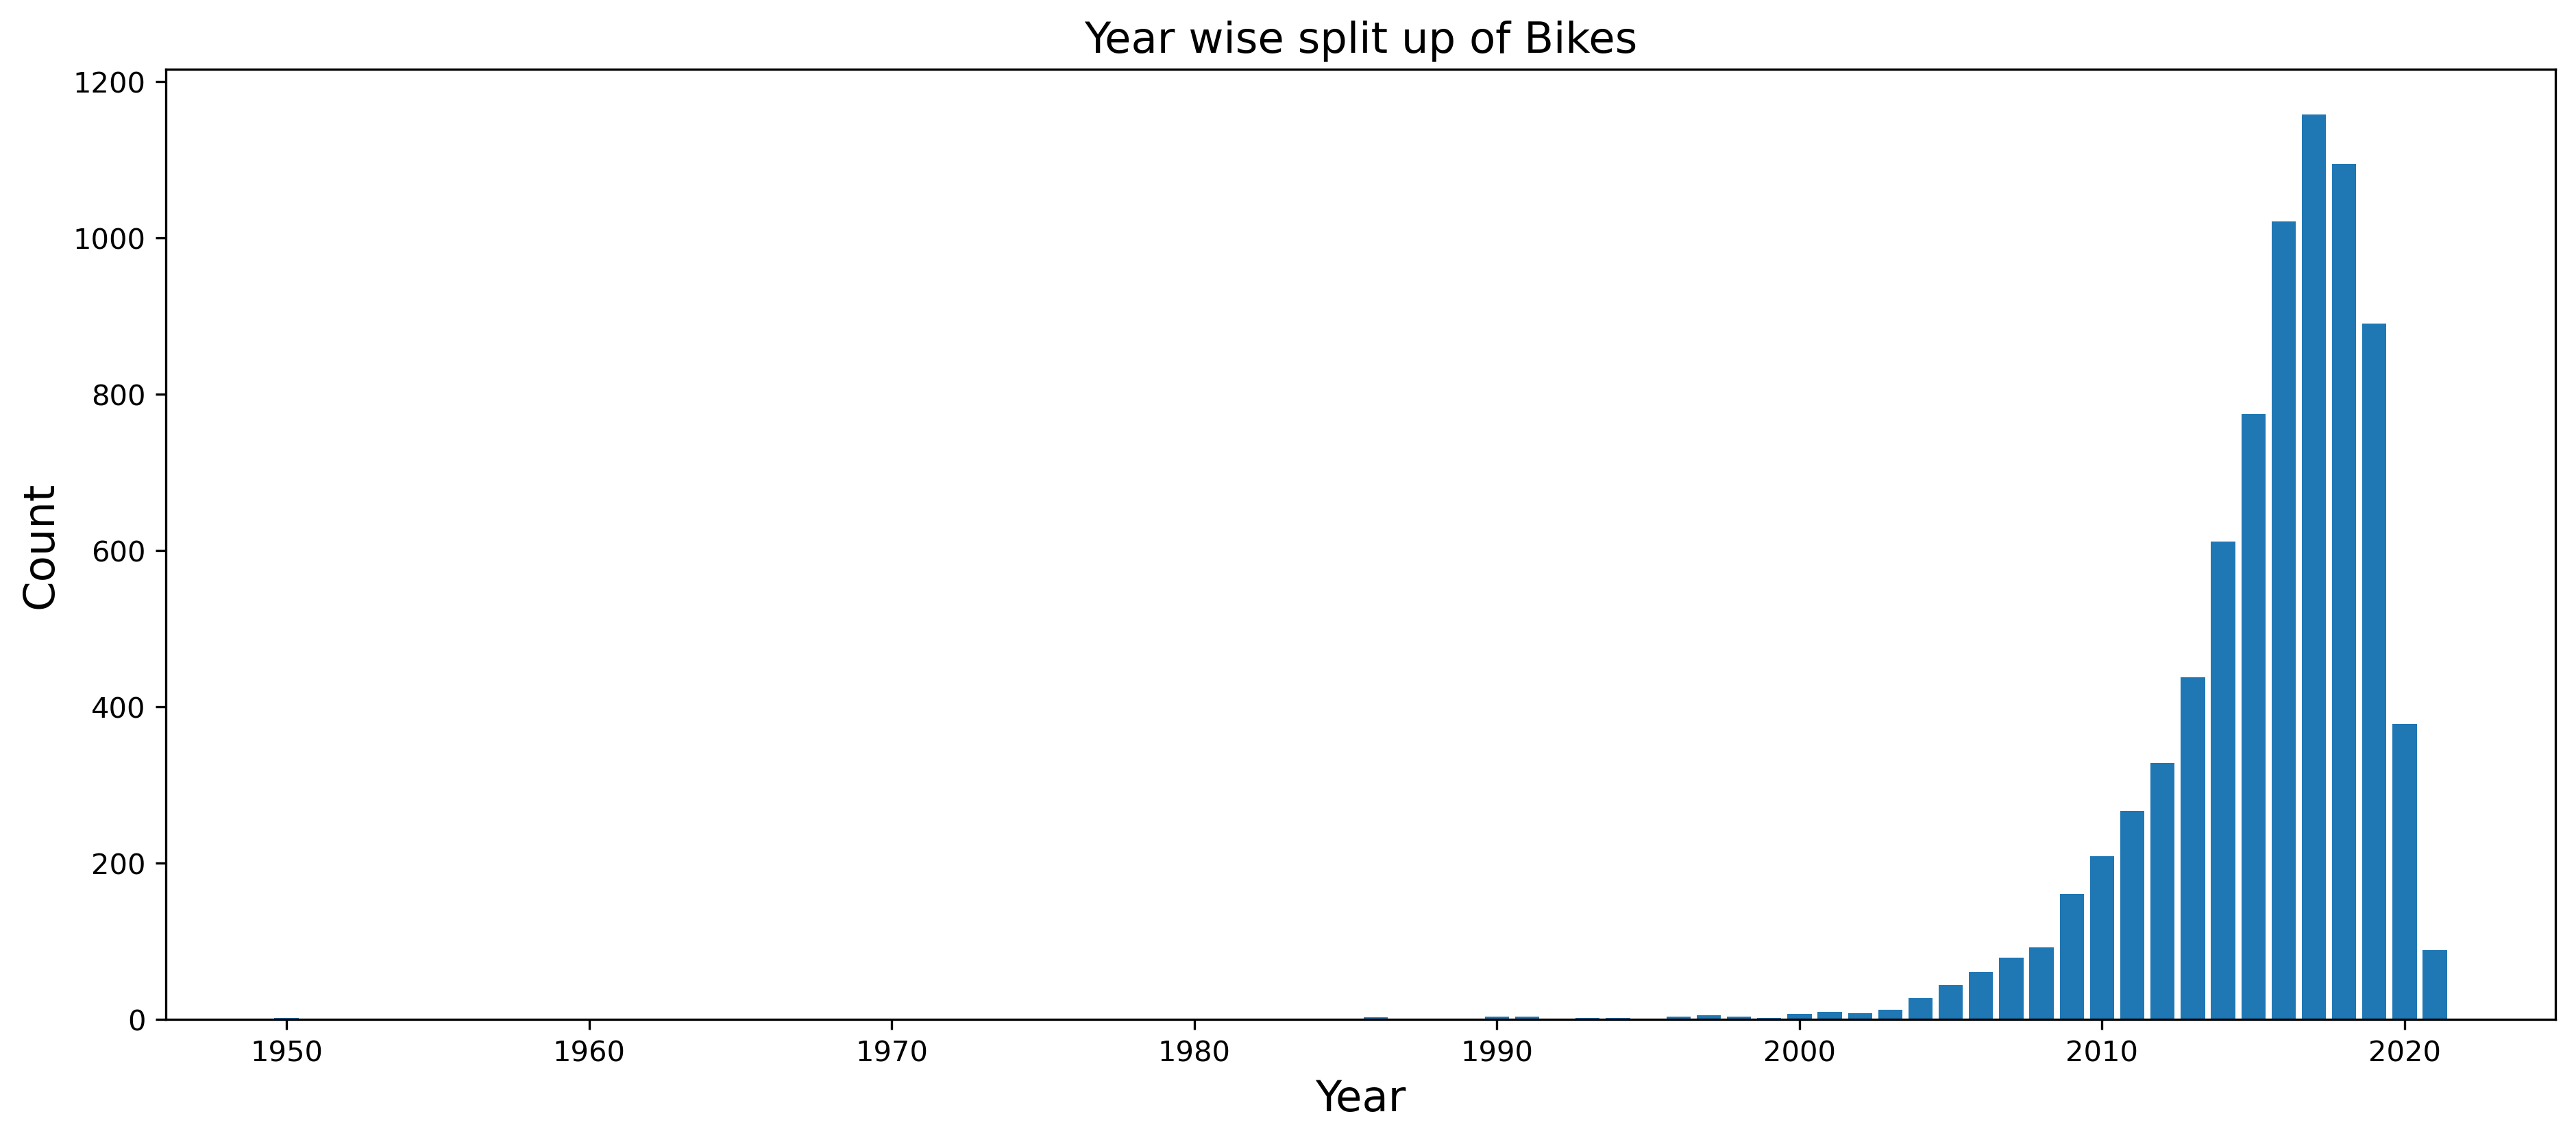

In [14]:
plt.figure(figsize=(15,6))
x,count = np.unique(df.model_year,return_counts=True)
plt.bar(x,count)
plt.title("Year wise split up of Bikes",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Count",fontsize=15)

In [15]:
brands = [i.split()[0] for i in df.model_name]
df['brand']=brands
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,Bajaj


Text(0, 0.5, 'Count')

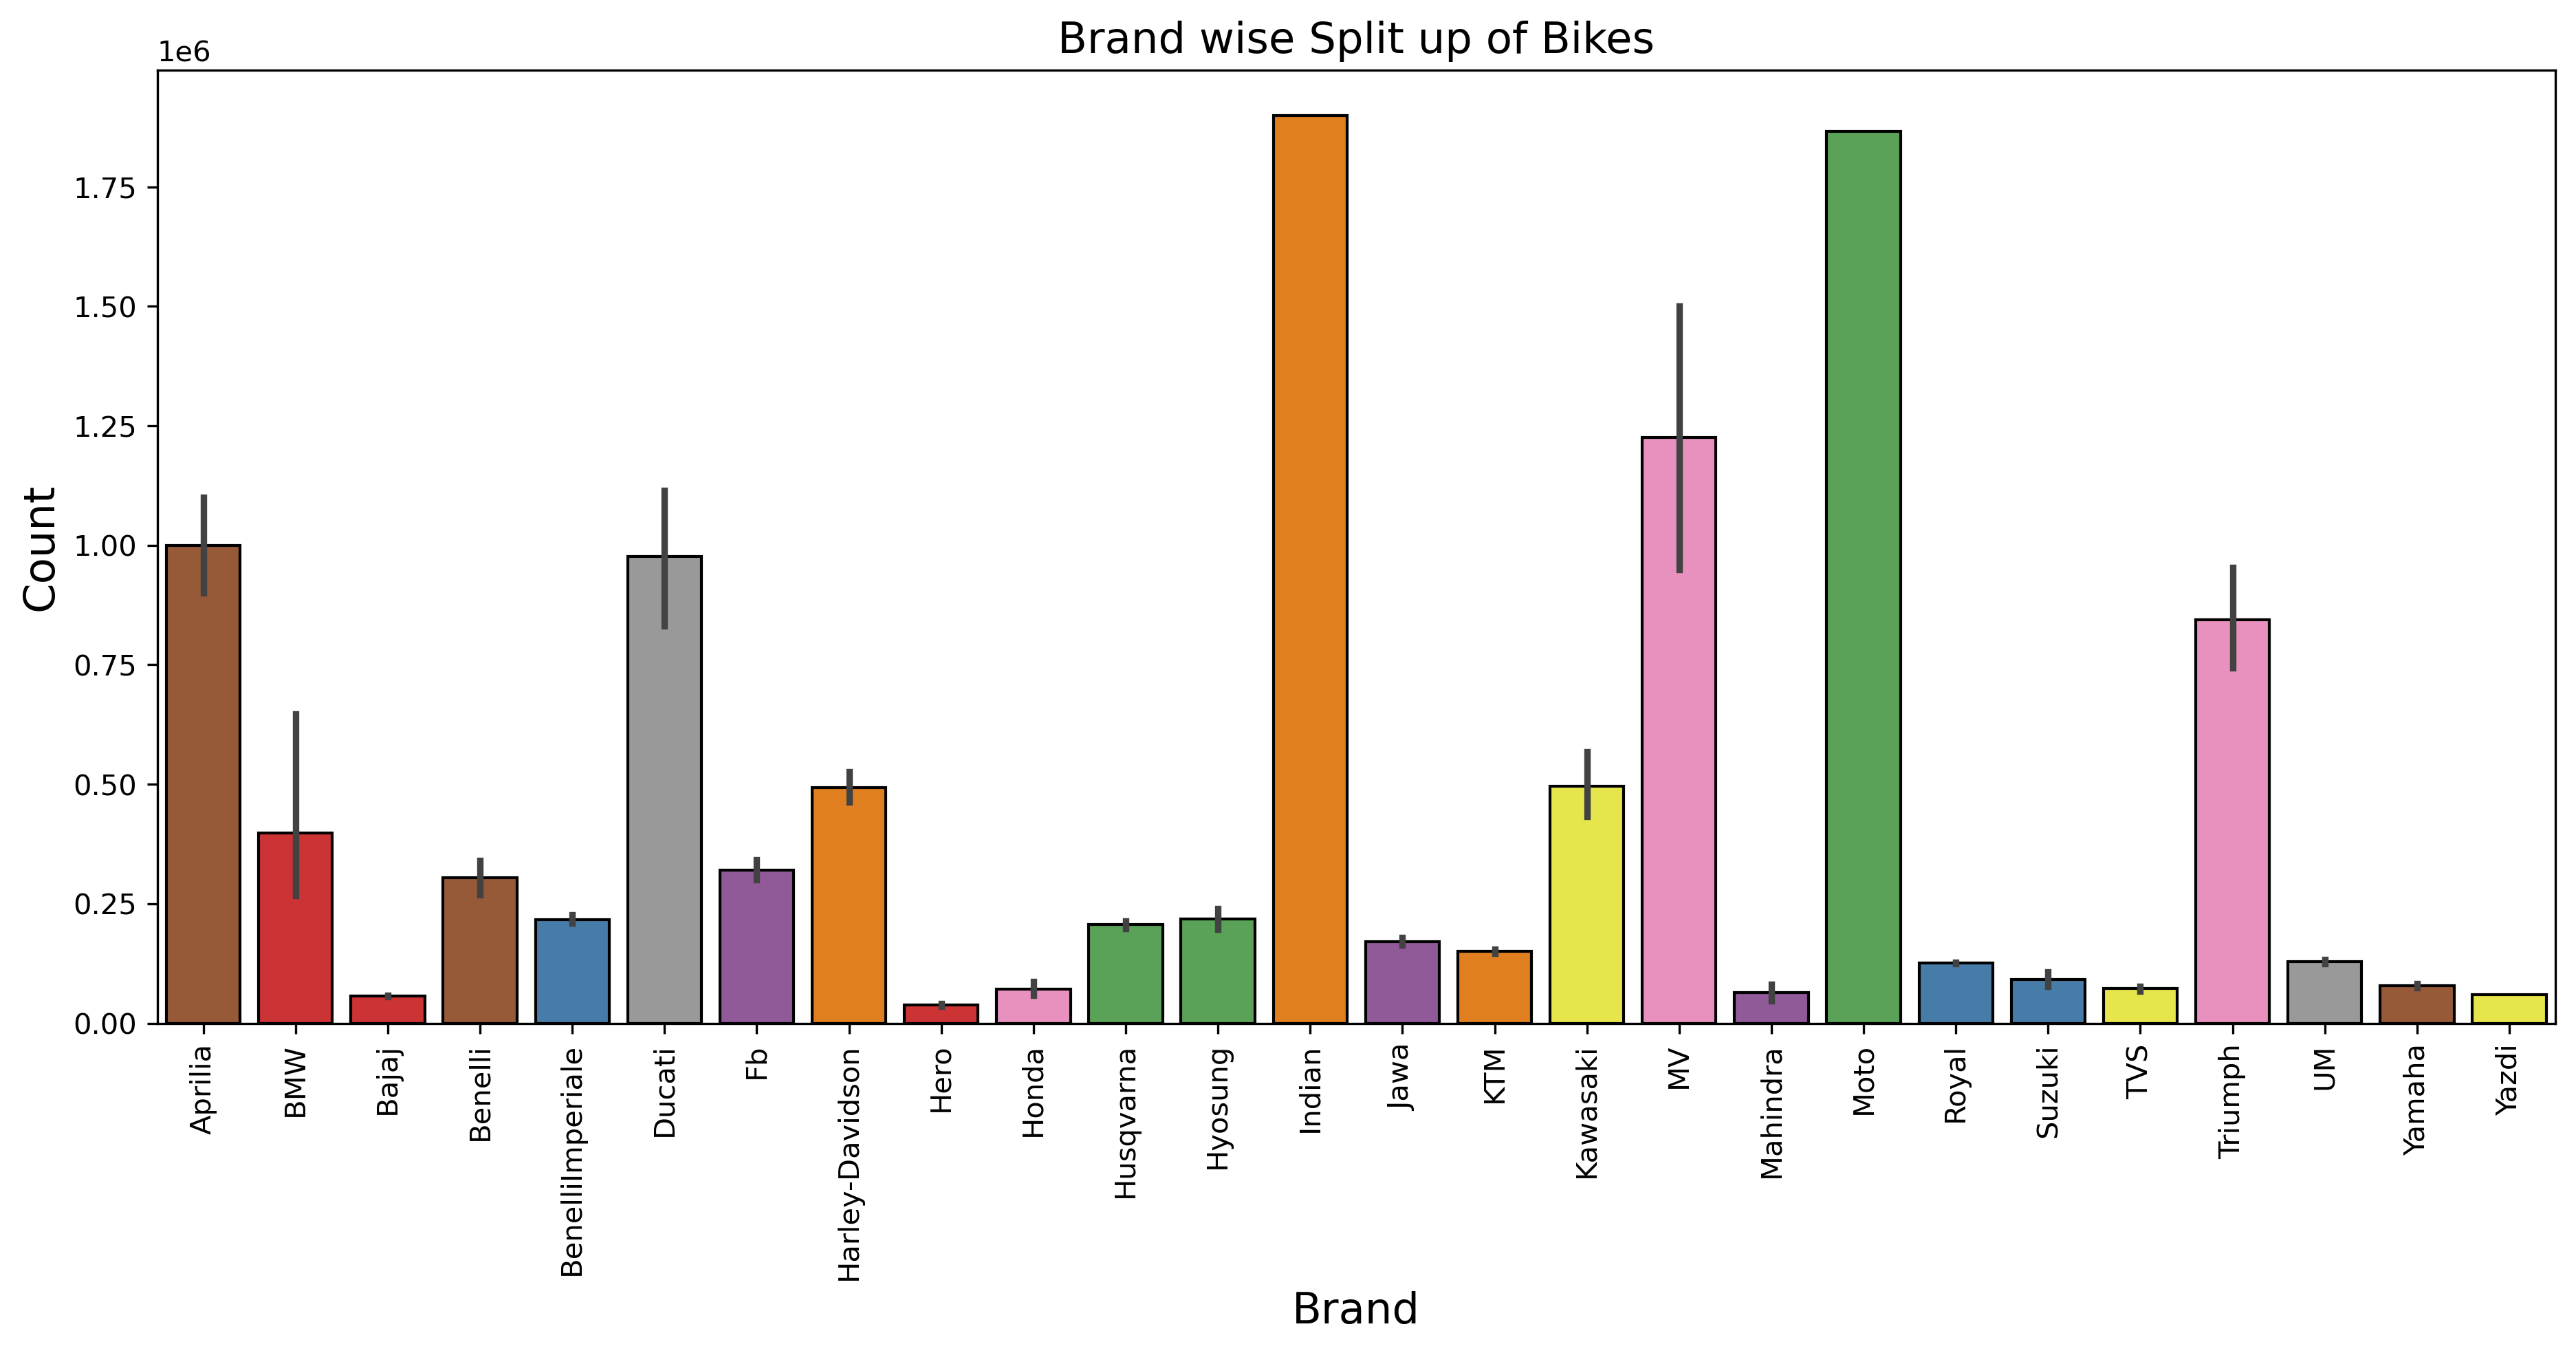

In [16]:
plt.figure(figsize=(15, 6))
x,count = np.unique(df.brand,return_counts=True)
plt.bar(x,count, edgecolor="black")
sns.barplot(x=df['brand'], y=df['price'], edgecolor="black", palette = 'Set1')
plt.title('Brand wise Split up of Bikes', fontsize=15)
plt.xlabel("Brand", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Count", fontsize=15)

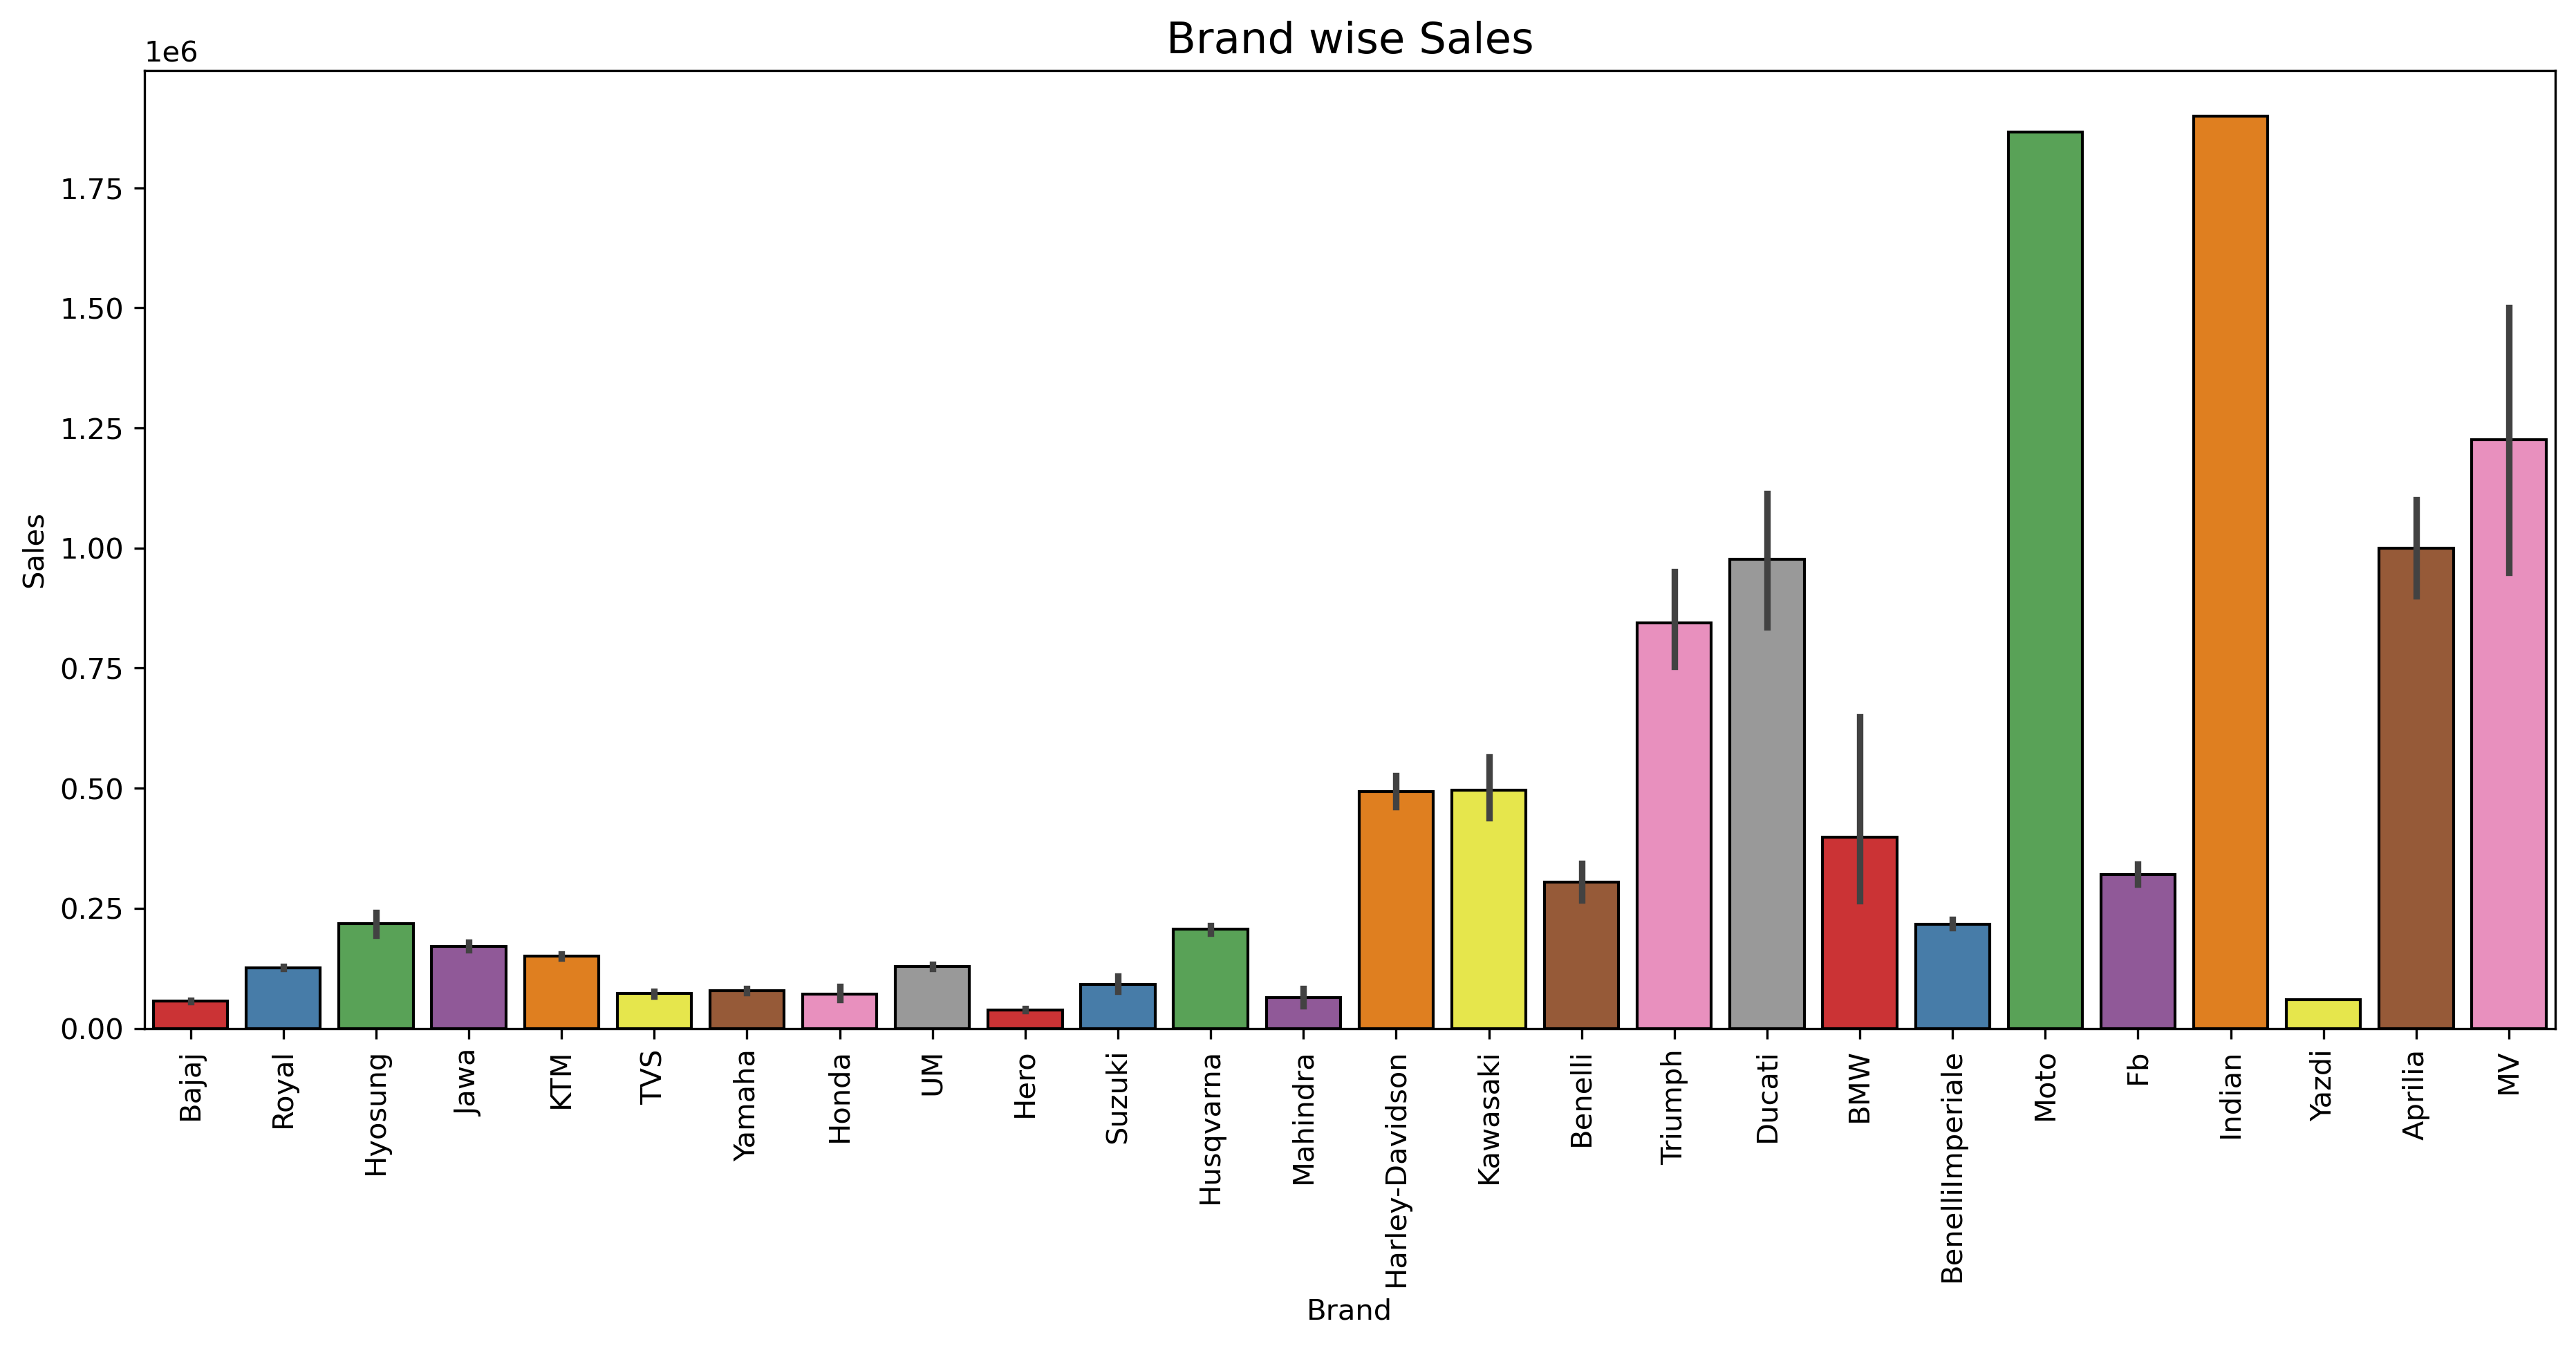

In [17]:
plt.figure(figsize=(15, 6))
plt.title('Brand wise Sales', fontsize= 15)
sns.barplot(x=df['brand'], y=df['price'], edgecolor="black", palette = 'Set1')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.show()

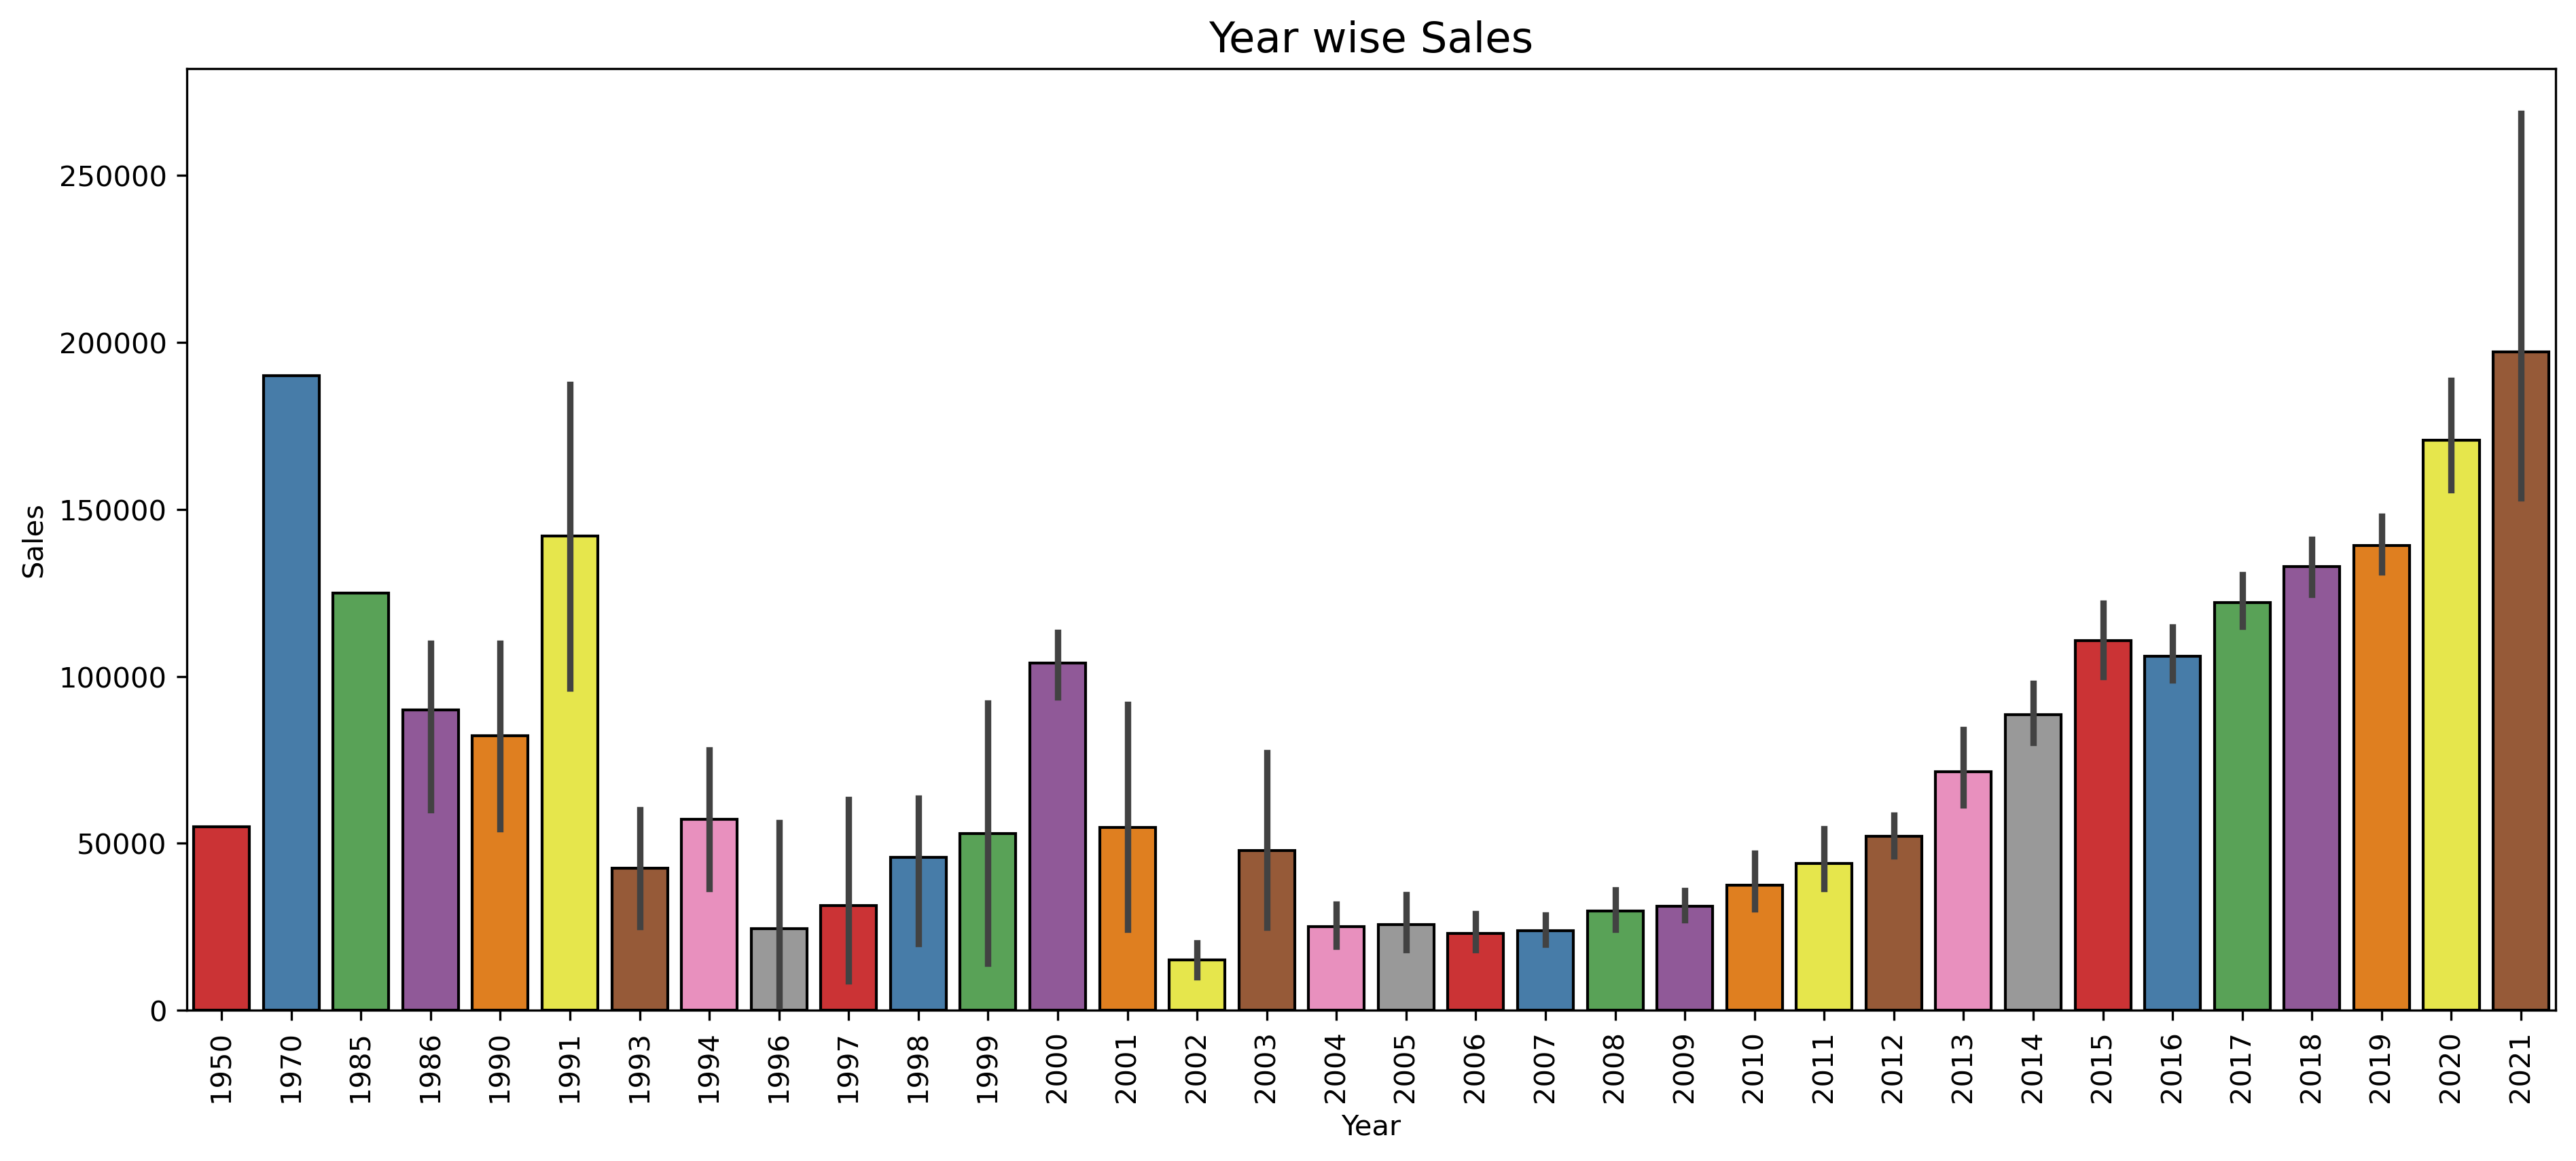

In [18]:
plt.figure(figsize=(15, 6))
plt.title('Year wise Sales', fontsize= 15)
sns.barplot(x=df['model_year'], y=df['price'], edgecolor="black", palette = 'Set1')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.show()

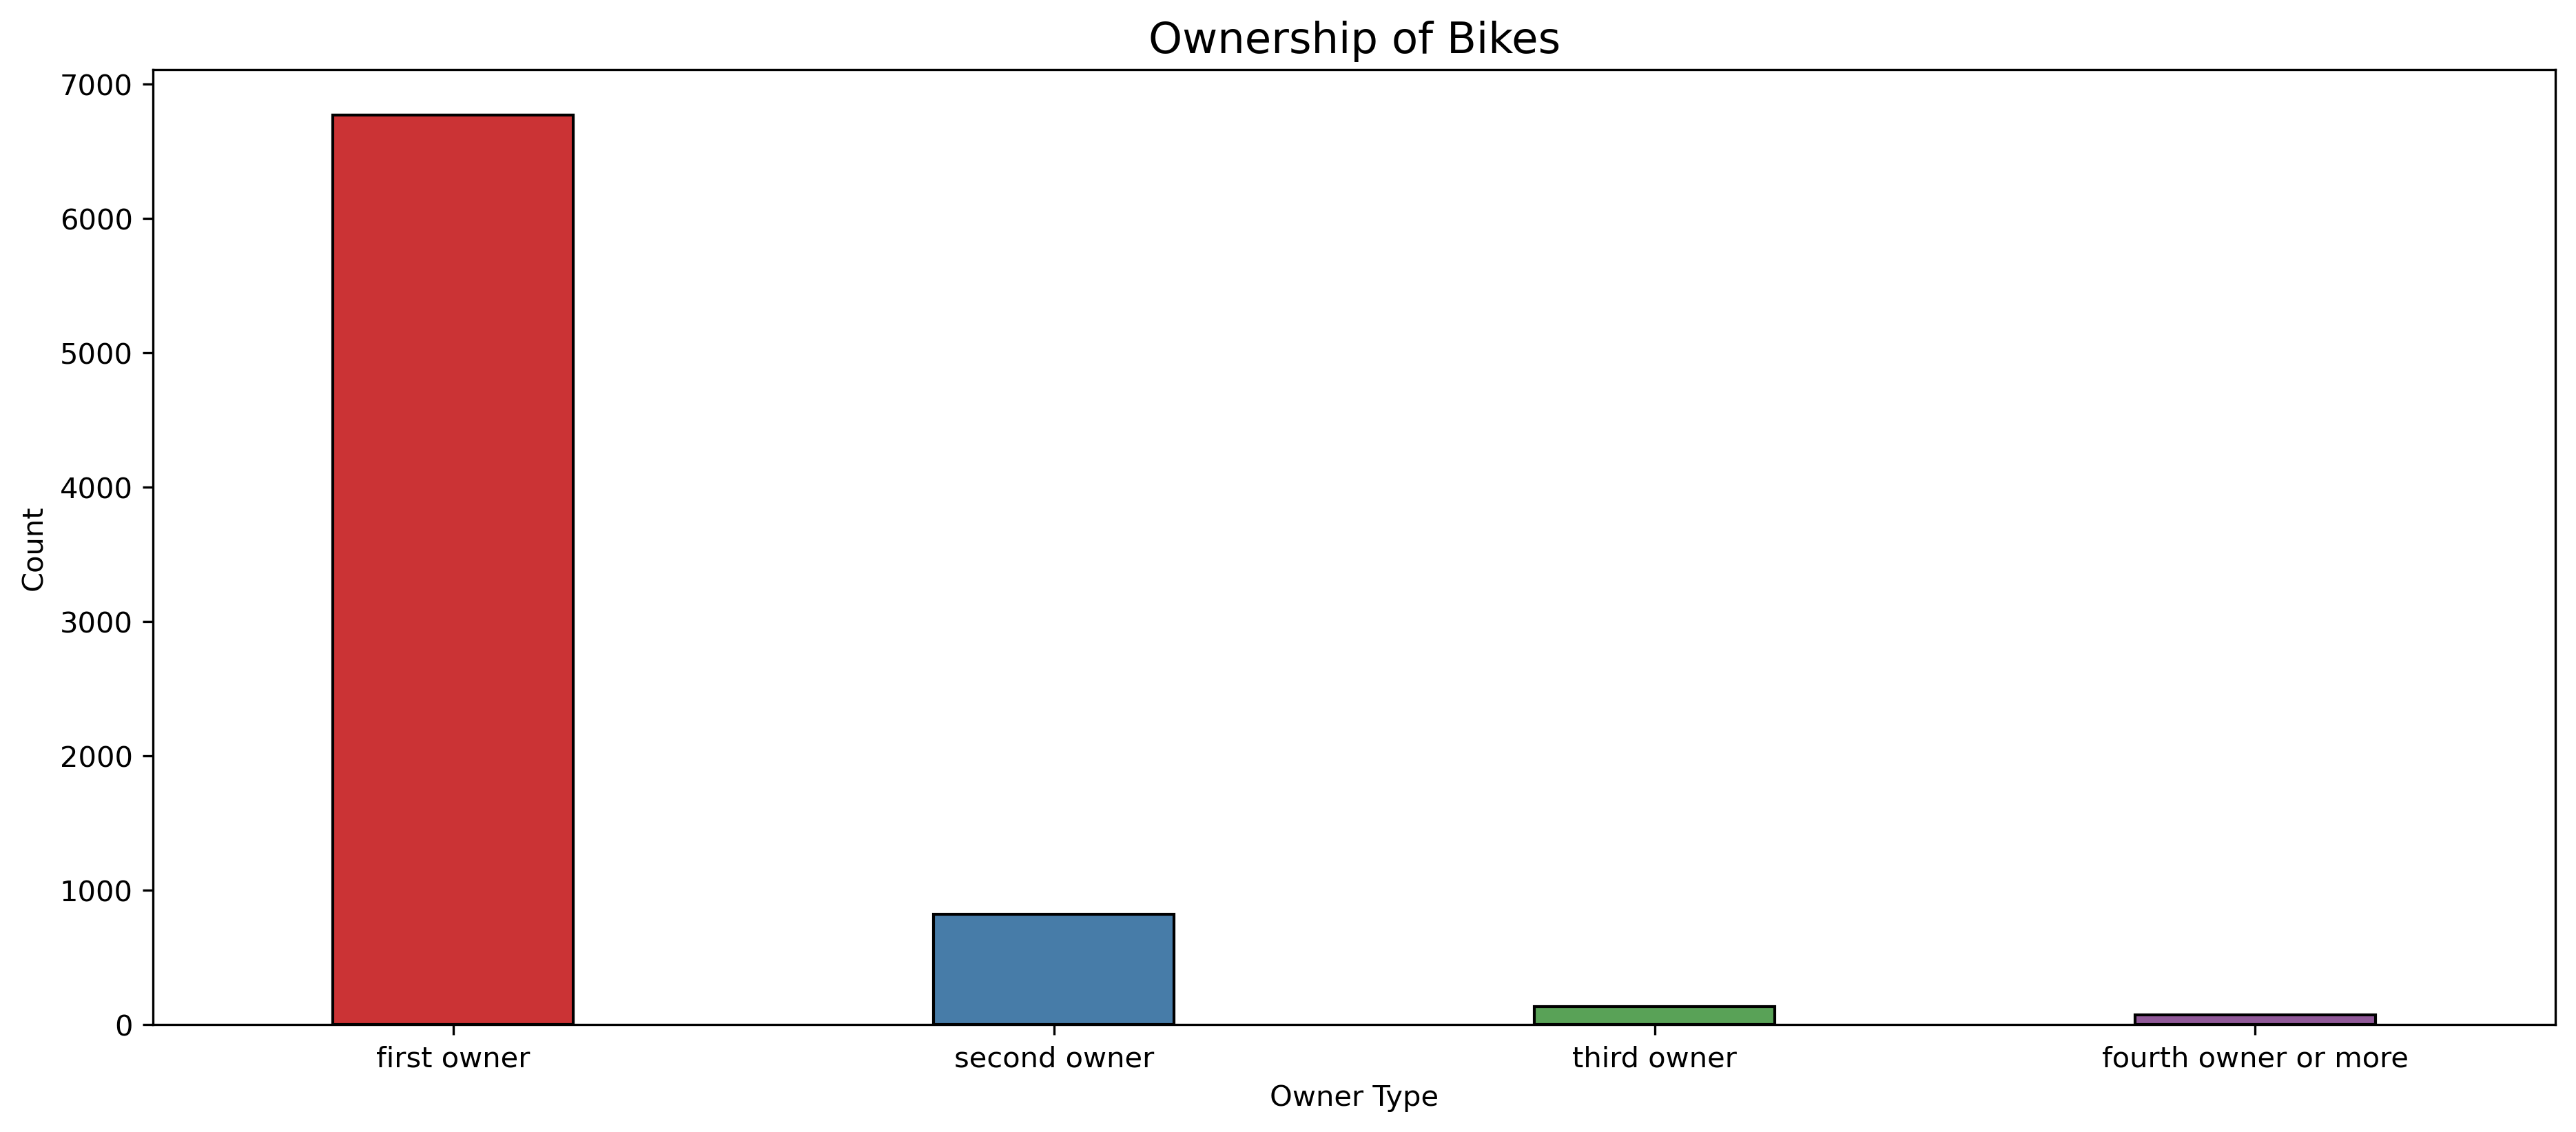

In [19]:
plt.figure(figsize=(15, 6))
plt.title('Ownership of Bikes', fontsize= 15)
sns.countplot(data=df, x = 'owner', order = df['owner'].value_counts().iloc[:5].index, edgecolor = 'black', width=0.4, palette='Set1')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()

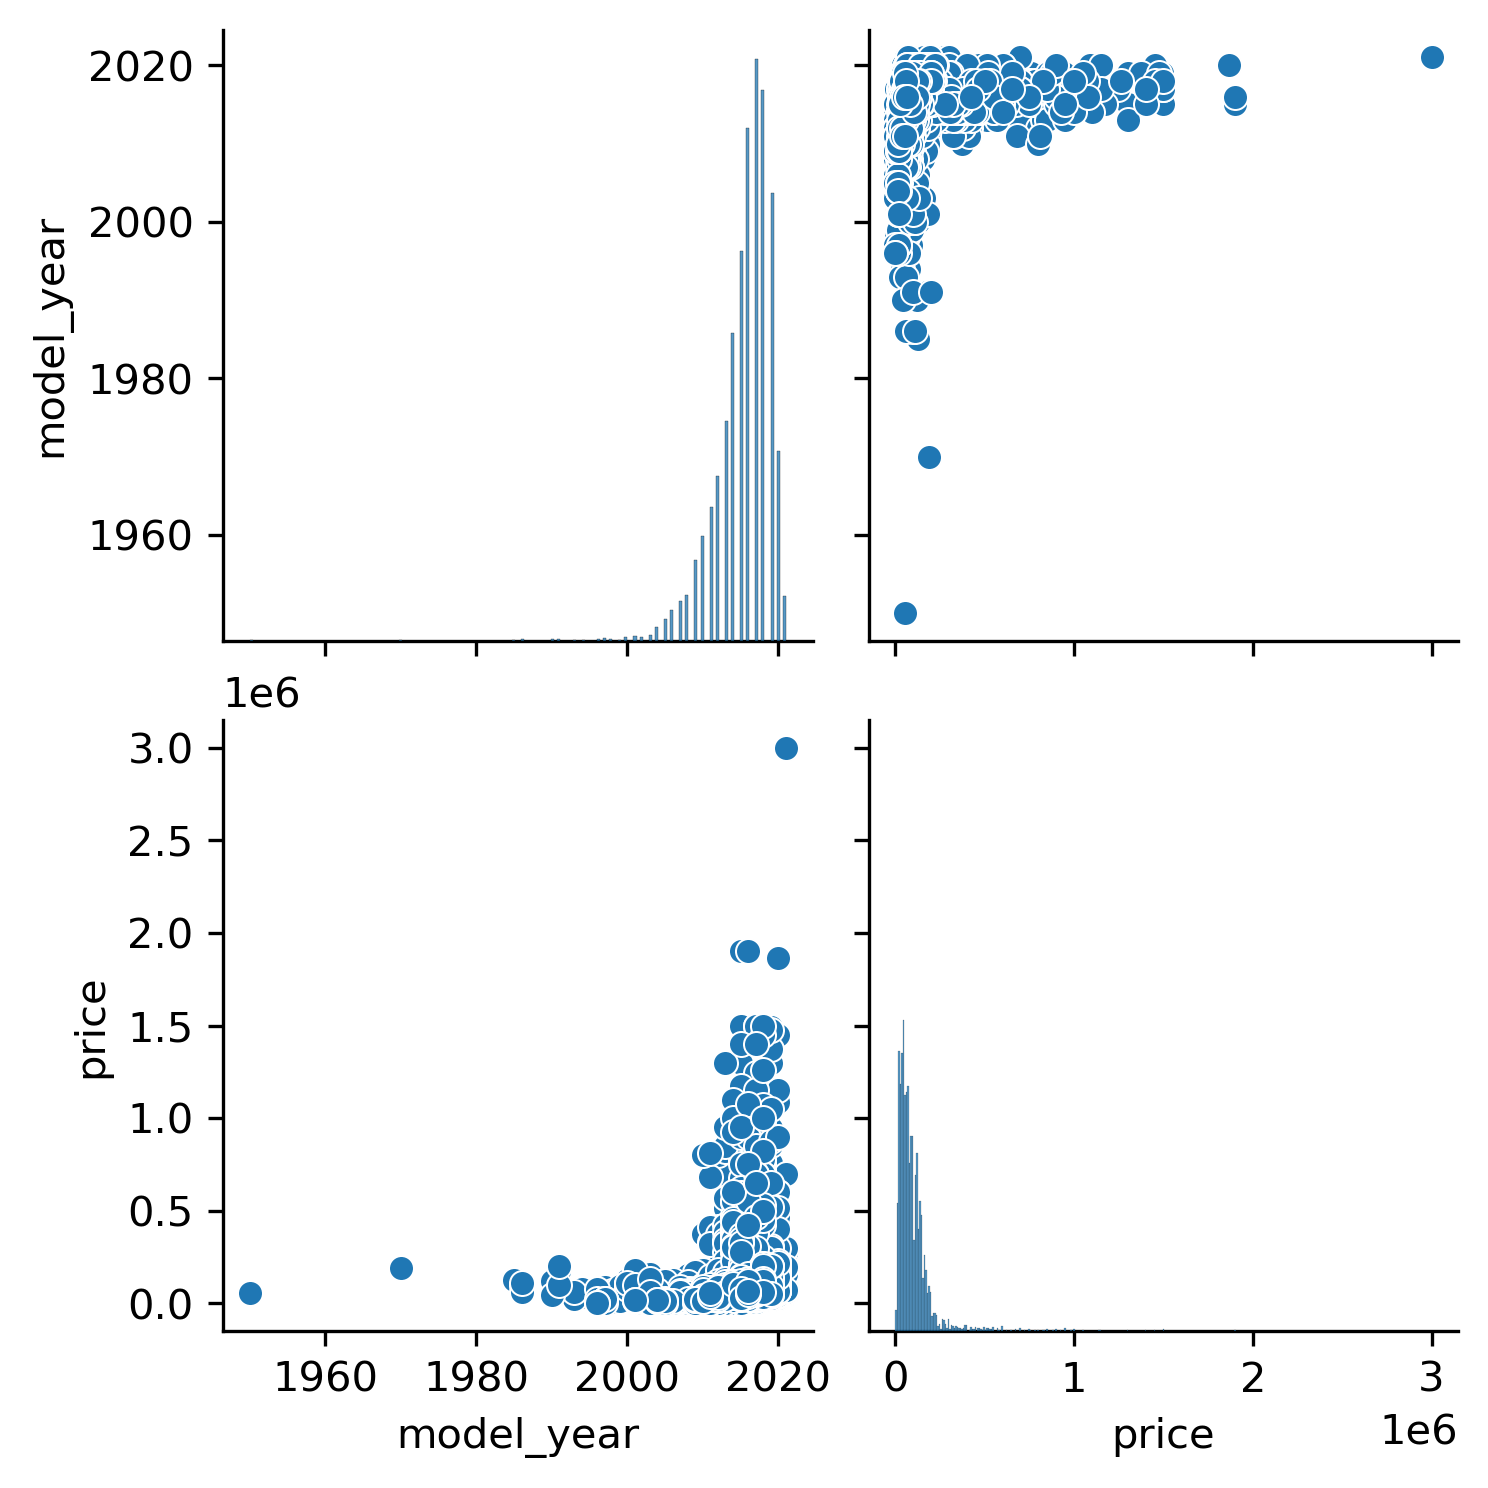

In [20]:
sns.pairplot(df)